## Bruke regresjon i Pyhton med eksterne datafiler

Vi har tidlegare brukt GeoGebra til regresjon av funksjonar. Dette fungerer fint og er eit godt hjelpemiddel. Vi skal i denne fila sjå på korleis vi kan gjennomføre regresjon i Python. Dette har nokre fordelar som vi skal kome tilbake til. 

Det første vi skal sjå på er korleis ein kan gjennomføre modellering i Python ved hjelp av verktyet "Curve-fit" frå biblioteket "Scipy.optimize".

__Kjelder:__ _Alle dømer og data i denne gjennomgangen er henta frå læreverket "Matematikk R2" av Aschehoug forlag._



##### __Koden under skal modellere følgande situasjon:__

Tidevatnet i Bergen varierte 19. september 2021. Data er vist i listene under: 

__tid__ = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23] 

__vannstand__ = [94, 43, 26, 61, 113, 138, 111, 59, 35, 64, 117, 146]

Lag ein modell _h(t)_ som viser vannstanden over sjøkartnull i cm _t_ timar etter midnatt.

A = 54.92
phi = 52.48
d = 83.88


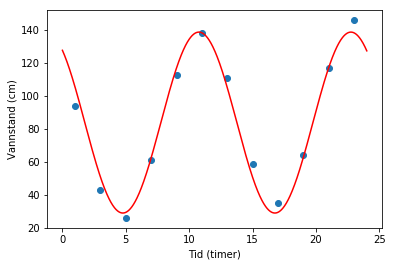

In [10]:
from pylab import *
from scipy.optimize import curve_fit 

# Leser inn dataene 
tid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23] 
vannstand = [94, 43, 26, 61, 113, 138, 111, 59, 35, 64, 117, 146]

# Definerer funksjonen h som en generell funksjon. Perioden er gitt av oppgåveteksten. 
def h(t, A, phi, d): 
    return A*sin(0.524*t + phi) + d 

# Bestemmer konstantene ved hjelp av curve_fit
[A, phi, d] = curve_fit(h, tid, vannstand)[0] 
print("A =", round(A, 2)) 
print("phi =", round(phi, 2)) 
print("d =", round(d, 2)) 

# Plotter dataene sammen med grafen til h 
plot(tid, vannstand, "o") 
xlabel("Tid (timer)") 
ylabel("Vannstand (cm)") 
t = linspace(0, 24, 1000) 
plot(t, h(t, A, phi, d), "r") 
show()

### Importere data

Den store fordelen med å gjennomføre regresjon i Python er at vi kan hente data rett frå datafiler og slepp å skrive dei inn i reknearket i GeoGebra. Under ser vi på korleis vi kan lese data frå ei såkalla .csv (Comma-Separated-Values)- fil. 

A = 54.92
phi = 52.48
d = 83.88


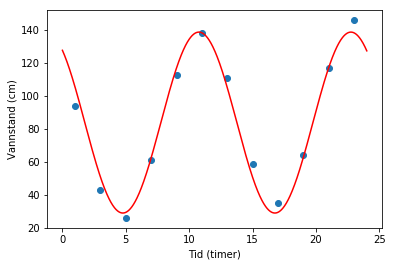

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

#Hentar inn data frå fila Tidevann.csv
df = pd.read_csv("Tidevann.csv", sep=";", decimal='.')

time=df['tid'].tolist()
vasstand=df['vannstand'].tolist()

# Definerer funksjonen h 
def h(t, A, phi, d): 
    return A*sin(0.524*t + phi) + d 

# Bestemmer konstantene 
[A, phi, d] = curve_fit(h, time, vasstand)[0] 
print("A =", round(A, 2)) 
print("phi =", round(phi, 2)) 
print("d =", round(d, 2)) 

# Plotter dataene sammen med grafen til h 
plot(tid, vannstand, "o") 
xlabel("Tid (timer)") 
ylabel("Vannstand (cm)") 
t = linspace(0, 24, 1000) 
plot(t, h(t, A, phi, d), "r") 
show()

### Samansette funksjonar

#### Vi ser under på korleis vi kan bruke GeoGebra og python til å lage samansette modellar. 

Dømet er henta frå "Matematikk R2" av Aschehoug. 

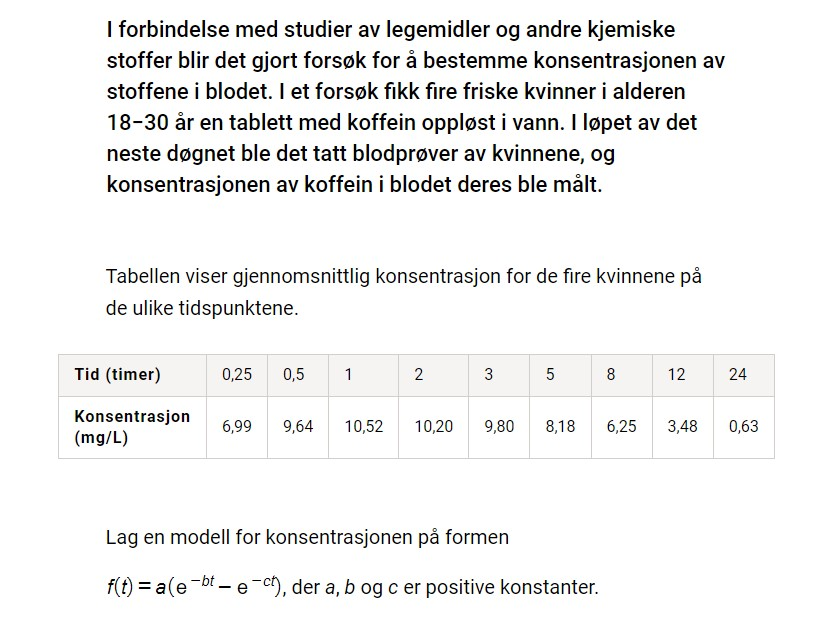

#### Vi begynner i GeoGebra

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in power
  # Remove the CWD from sys.path while we load stuff.


a = 12.692
b = 0.09807
c = 3.293


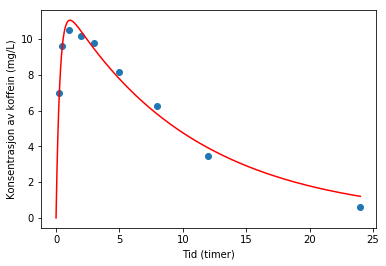

In [12]:
from pylab import *
from scipy.optimize import curve_fit

# Leser inn dataene
tid = [0.25, 0.50, 1, 2, 3, 5, 8, 12, 24]
koffein = [6.99, 9.64, 10.52, 10.20, 9.80, 8.18, 6.25, 3.48, 0.63]

# Definerer funksjonen f
def f(t, a, b, c):
    return a*(e**(-b*t) - e**(-c*t))

# Bestemmer a, b og c
[a, b, c] = curve_fit(f, tid, koffein)[0]
print("a =", round(a, 3))
print("b =", round(b, 5))
print("c =", round(c, 3))

# Plotter dataene sammen med grafen til f
plot(tid, koffein, "o")
xlabel("Tid (timer)")
ylabel("Konsentrasjon av koffein (mg/L)")
t = linspace(0, 24, 1000)
plot(t, f(t, a, b, c), "r")
show()

### Samansette modellar med store datafiler

Under er det brukt data frå "Mauna Loa" - observatoriet på Hawaii og målingane av CO2-konsentrasjon i ein utvald periode. Koden er henta frå læreverket "Matematikk R2" av Aschehoug og nyttar ein litt annan importering av datafila. Verd å studere for dei som er ekstra nysgjerrige!

a = 2.58
b = 400.05
c = -3.05
d = 15.43


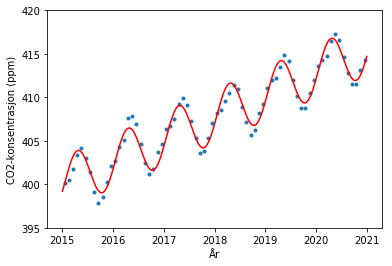

In [7]:
from pylab import *
from scipy.optimize import curve_fit

# Leser inn dataene og trekker ut verdiene for perioden 2015−2020
co2_alle = loadtxt("co2_mm_mlo.txt", delimiter = ",", usecols = (2, 3))
aar_alle = co2_alle[:, 0]
co2_alle = co2_alle[:, 1]
intervall = (aar_alle >= 2015) & (aar_alle < 2021)
aar = aar_alle[intervall]
co2 = co2_alle[intervall]

# Definerer funksjonen f
def f(t, a, b, c, d):
    return a*t + b + c*sin(2*pi*t + d)

# Bestemmer verdiene av parametrene og skriver ut verdiene
[a, b, c, d] = curve_fit(f, aar-2015, co2)[0]
print("a =", round(a, 2))
print("b =", round(b, 2))
print("c =", round(c, 2))
print("d =", round(d, 2))

# Lager plott av dataene med tilpasset kurve
plot(aar, co2, ".")
ylim(395, 420)
xlabel("År")
ylabel("CO2-konsentrasjon (ppm)")
t = linspace(0, 6, 1000)
plot(t + 2015, f(t, a, b, c, d), "r")
show()